<a href="https://colab.research.google.com/github/JoaquinGonzalezSimon/Data_science_and_ML_from_Medium/blob/main/220711_Microsoft_Stock_Price_Prediction_with_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### This project was taken from the following link and I use it to practice my skills

https://thecleverprogrammer.com/2021/06/21/microsoft-stock-price-prediction-with-machine-learning/

https://medium.com/coders-camp/180-data-science-and-machine-learning-projects-with-python-6191bc7b9db9

In [1]:
%pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 656 kB/s 
     |████████████████████████████████| 6.4 MB 12.1 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.28.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import seaborn as sns
import datetime
from datetime import timedelta, time, date

In [3]:
sns.set()
plt.style.use('fivethirtyeight')

In [8]:
date.today()

datetime.date(2022, 7, 11)

In [10]:
end_date = date.today() - timedelta(3)
end_date = end_date.strftime('%Y-%m-%d')
end_date

'2022-07-08'

In [11]:
start_date = date.today() - timedelta(365*5)
start_date = start_date.strftime('%Y-%m-%d')
start_date

'2017-07-12'

In [12]:
data = yf.download('MSFT', start=start_date, end=end_date, progress=True)

[*********************100%***********************]  1 of 1 completed


In [13]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-07-12,70.690002,71.279999,70.550003,71.150002,66.642921,17750900
2017-07-13,71.500000,72.040001,71.309998,71.769997,67.223648,20269800
2017-07-14,72.239998,73.269997,71.959999,72.779999,68.169670,25868100
2017-07-17,72.800003,73.449997,72.720001,73.349998,68.703560,21803900
2017-07-18,73.089996,73.389999,72.660004,73.300003,68.656723,26435300


In [14]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-06-30,257.049988,259.529999,252.899994,256.829987,256.829987,31730900
2022-07-01,256.390015,259.769989,254.610001,259.579987,259.579987,22825200
2022-07-05,256.160004,262.980011,254.740005,262.850006,262.850006,22941000
2022-07-06,263.750000,267.989990,262.399994,266.209991,266.209991,23824400
2022-07-07,265.119995,269.059998,265.019989,268.399994,268.399994,20859900


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1256 entries, 2017-07-12 to 2022-07-07
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1256 non-null   float64
 1   High       1256 non-null   float64
 2   Low        1256 non-null   float64
 3   Close      1256 non-null   float64
 4   Adj Close  1256 non-null   float64
 5   Volume     1256 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 68.7 KB


In [18]:
data.reset_index(drop=False, inplace=True)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1256 entries, 0 to 1255
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1256 non-null   datetime64[ns]
 1   Open       1256 non-null   float64       
 2   High       1256 non-null   float64       
 3   Low        1256 non-null   float64       
 4   Close      1256 non-null   float64       
 5   Adj Close  1256 non-null   float64       
 6   Volume     1256 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 68.8 KB


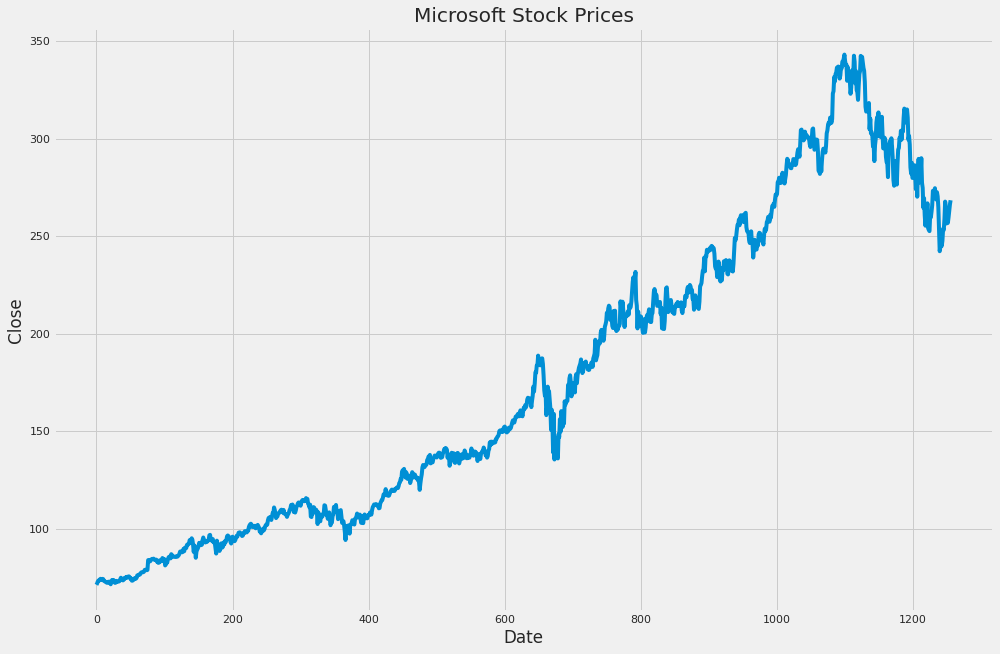

In [20]:
plt.figure(figsize=(15,10))
plt.title('Microsoft Stock Prices')
plt.xlabel('Date')
plt.ylabel('Close')
plt.plot(data['Close'])
plt.show()

In [21]:
print(data.corr())

               Open      High       Low     Close  Adj Close    Volume
Open       1.000000  0.999742  0.999686  0.999376   0.999367  0.050972
High       0.999742  1.000000  0.999569  0.999663   0.999681  0.060192
Low        0.999686  0.999569  1.000000  0.999694   0.999648  0.038859
Close      0.999376  0.999663  0.999694  1.000000   0.999975  0.048018
Adj Close  0.999367  0.999681  0.999648  0.999975   1.000000  0.048851
Volume     0.050972  0.060192  0.038859  0.048018   0.048851  1.000000


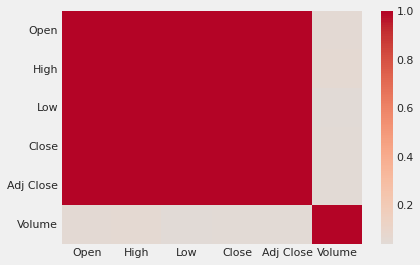

In [23]:
sns.heatmap(data.corr(), center=0, cmap='coolwarm')
plt.show()

In [25]:
x = np.array(data[['Open', 'High', 'Low']])
y = np.array(data['Close'])
y = y.reshape(-1,1)

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [27]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2)
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((1004, 3), (252, 3), (1004, 1), (252, 1))

In [28]:
model = DecisionTreeRegressor()
model.fit(xtrain, ytrain)

DecisionTreeRegressor()

In [29]:
ypred = model.predict(xtest)

In [30]:
ypred.shape

(252,)

In [33]:
from sklearn import metrics

In [34]:
metrics.mean_squared_error(ytest, ypred)

5.424245184771569

In [35]:
metrics.mean_absolute_error(ytest, ypred)

1.529682098873078

In [36]:
metrics.mean_absolute_percentage_error(ytest, ypred)

0.008047509565083549

In [37]:
metrics.r2_score(ytest, ypred)

0.9991878349602803